# 흡연과 여러 변수들과의 관계
변수: 당뇨, 비만, 3대암(위암, 간암, 폐암)

### 비만을 제외한 나머지 변수들은, 흡연자 그룹이 비흡연자 그룹에 비해 발병률이 높게 나타날 것이다. 특히 폐암의 경우는 두드러진 차이를 보일 것으로 예상된다. 또한, 하루평균 흡연량이 많을 수록 질병의 발병률이 더 높게 나타날 것이다. 

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
data10 = pd.read_csv('hn10_all.csv')
data11 = pd.read_csv('hn11_all.csv')
data12 = pd.read_csv('hn12_all.csv')
data13 = pd.read_csv('hn13_all.csv')
data14 = pd.read_csv('hn14_all.csv')
data15 = pd.read_csv('hn15_all.csv')
data16 = pd.read_csv('hn16_all.csv')
data17 = pd.read_csv('hn17_all.csv')
data18 = pd.read_csv('hn18_all.csv')
data19 = pd.read_csv('hn19_all.csv')

C:\Users\SAMSUNG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (203,209,347,368,428,458,463,656) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\SAMSUNG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (113,146,157,343,364,424,457,461) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\SAMSUNG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (123,329,350,410,443,447,633) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\SAMSUNG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (604,607,608) have mixed types.Specify dtype option on import or

In [3]:
data=pd.concat([data10,data11,data12,data13,data14,data15,data16,data17,data18,data19])
data.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,BS12_47_1,BS12_47_2,HE_nc,HE_insulin_etc,HE_DM_HbA1c,HE_HBsAg_etc,HE_Ucrea_etc,HE_Ualb_etc,N_FOLATE,LF_SECUR_Y
0,2019.03.06.,A308059801,A3080598,2010,1,1,2,A308,1,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.03.06.,A308059802,A3080598,2010,1,1,2,A308,2,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.03.06.,A308120201,A3081202,2010,1,1,2,A308,1,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.03.06.,A308120202,A3081202,2010,1,1,2,A308,2,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.03.06.,A308120203,A3081202,2010,1,1,2,A308,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 흡연자, 비흡연자를 나타내는 smoking column 생성

smoking_map={
    1.0: 1,
    2.0: 1,
    3.0: 0
}
# 1은 흡연자, 0은 비흡연자

data['smoking'] = data['BS1_1'].map(smoking_map)

### 하루평균 흡연량(BS3_2 column) 구간화 진행: 
###### 1단계: 반갑이내(~10개비)       
###### 2단계: 반갑 ~ 한갑 이내( 11~20개비 )
###### 3단계: 한갑 ~ 두갑 이내( 21~40개 )             
###### 4단계: 두갑 초과( 41개비~ )

In [5]:
data.BS3_2.unique()

array([888.,  15.,  10.,  nan,  20.,   5.,  30.,   4.,   3.,   2.,   6.,
        18.,   1.,   7.,  25.,  13.,  40., 999.,   8.,  35.,  23.,  12.,
        11.,  17.,  19.,   9.,  50.,  60.,  33.,  14.,  16.,  28.,  70.,
        24.,  45.,  22.,  48.,  55.,  21.,  26.,  38.,  37.,  32.])

In [6]:
smoking_cut = [0, 10, 20, 40, 100]
data['smoking_stage'] = pd.cut(data.BS3_2, smoking_cut, labels = ['1단계','2단계', '3단계', '4단계'])
data.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,HE_nc,HE_insulin_etc,HE_DM_HbA1c,HE_HBsAg_etc,HE_Ucrea_etc,HE_Ualb_etc,N_FOLATE,LF_SECUR_Y,smoking,smoking_stage
0,2019.03.06.,A308059801,A3080598,2010,1,1,2,A308,1,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,2019.03.06.,A308059802,A3080598,2010,1,1,2,A308,2,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2019.03.06.,A308120201,A3081202,2010,1,1,2,A308,1,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2단계
3,2019.03.06.,A308120202,A3081202,2010,1,1,2,A308,2,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,2019.03.06.,A308120203,A3081202,2010,1,1,2,A308,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# obesity column 추가

obesity_map={
    1.0: 0,
    2.0: 0.5,
    3.0: 1,
    4.0: 1,
    5.0: 1,
    6.0: 1
}
# 0은 저체중, 0.5는 정상체중, 1은 비만

data['obesity'] = data['HE_obe'].map(obesity_map)

In [8]:
# stomach_cancer column 추가

stomach_cancer_map={
    0.0: 0,
    1.0: 1
}
# 1은 위암 진단 받은 사람, 0은 위암에 걸리지 않은 사람

data['stomach_cancer'] = data['DC1_dg'].map(stomach_cancer_map)

In [9]:
# liver_cancer column 추가

liver_cancer_map={
    0.0: 0,
    1.0: 1
}
# 1은 간암 진단 받은 사람, 0은 간암에 걸리지 않은 사람

data['liver_cancer'] = data['DC2_dg'].map(liver_cancer_map)

In [10]:
# lung_cancer column 추가

lung_cancer_map={
    0.0: 0,
    1.0: 1
}
# 1은 폐암 진단 받은 사람, 0은 폐암에 걸리지 않은 사람

data['lung_cancer'] = data['DC6_dg'].map(lung_cancer_map)

In [11]:
# 필요한 column만을 추출하여 새로운 데이터 프레임 생성

data = data.loc[:,['ID','sex','age','smoking','smoking_stage', 'HE_DMdg','obesity','stomach_cancer','liver_cancer','lung_cancer']]
data.head()

,ID,sex,age,smoking,smoking_stage,HE_DMdg,obesity,stomach_cancer,liver_cancer,lung_cancer
0,A308059801,1,61,1.0,NaN,0.0,1.0,NaN,NaN,NaN
1,A308059802,2,54,0.0,NaN,0.0,0.5,NaN,NaN,NaN
2,A308120201,1,33,1.0,2단계,0.0,1.0,NaN,NaN,NaN
3,A308120202,2,33,1.0,NaN,0.0,0.5,NaN,NaN,NaN
4,A308120203,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data = data[data['smoking'].notna()]
data.head()

,ID,sex,age,smoking,smoking_stage,HE_DMdg,obesity,stomach_cancer,liver_cancer,lung_cancer
0,A308059801,1,61,1.0,NaN,0.0,1.0,NaN,NaN,NaN
1,A308059802,2,54,0.0,NaN,0.0,0.5,NaN,NaN,NaN
2,A308120201,1,33,1.0,2단계,0.0,1.0,NaN,NaN,NaN
3,A308120202,2,33,1.0,NaN,0.0,0.5,NaN,NaN,NaN
5,A308199801,1,65,1.0,NaN,0.0,0.5,NaN,NaN,NaN


In [13]:
data = data.rename(columns = {'HE_DMdg':'diabetes'})
data.head()

,ID,sex,age,smoking,smoking_stage,diabetes,obesity,stomach_cancer,liver_cancer,lung_cancer
0,A308059801,1,61,1.0,NaN,0.0,1.0,NaN,NaN,NaN
1,A308059802,2,54,0.0,NaN,0.0,0.5,NaN,NaN,NaN
2,A308120201,1,33,1.0,2단계,0.0,1.0,NaN,NaN,NaN
3,A308120202,2,33,1.0,NaN,0.0,0.5,NaN,NaN,NaN
5,A308199801,1,65,1.0,NaN,0.0,0.5,NaN,NaN,NaN


In [14]:
len(data)

58312

In [15]:
# 열을 지정하여 결측값(NaN)이 포함한 행을 제거

data = data[data['smoking'].notna()]
data = data[data['obesity'].notna()]
data = data[data['stomach_cancer'].notna()]
data = data[data['liver_cancer'].notna()]
data = data[data['lung_cancer'].notna()]
data.head()

,ID,sex,age,smoking,smoking_stage,diabetes,obesity,stomach_cancer,liver_cancer,lung_cancer
1,A159723016,1,29,1.0,NaN,0.0,1.0,0.0,0.0,0.0
4,A159724715,1,47,1.0,NaN,0.0,1.0,0.0,0.0,0.0
5,A159724716,2,36,0.0,NaN,0.0,0.5,0.0,0.0,0.0
6,A159726414,2,28,0.0,NaN,0.0,0.5,0.0,0.0,0.0
7,A159726415,2,59,0.0,NaN,0.0,0.5,0.0,0.0,0.0


In [82]:
len(data)

38588

In [17]:
(data.smoking == 1).sum()  # 흡연자 수

15253

In [18]:
(data.smoking == 0).sum() # 비흡연자 수

23335

In [83]:
data

,ID,sex,age,smoking,smoking_stage,diabetes,obesity,stomach_cancer,liver_cancer,lung_cancer
1,A159723016,1,29,1.0,NaN,0.0,1.0,0.0,0.0,0.0
4,A159724715,1,47,1.0,NaN,0.0,1.0,0.0,0.0,0.0
5,A159724716,2,36,0.0,NaN,0.0,0.5,0.0,0.0,0.0
6,A159726414,2,28,0.0,NaN,0.0,0.5,0.0,0.0,0.0
7,A159726415,2,59,0.0,NaN,0.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8103,R504375103,2,26,0.0,NaN,0.0,0.5,0.0,0.0,0.0
8104,R504380201,1,62,1.0,NaN,0.0,0.5,0.0,0.0,0.0
8105,R504381902,2,48,0.0,NaN,0.0,0.5,0.0,0.0,0.0
8106,R504393801,1,47,0.0,NaN,0.0,0.5,0.0,0.0,0.0


## 성별에 따른 흡연자의 비율

In [19]:
sex_smoking_ratio = data.groupby('sex').smoking.mean()
sex_smoking_ratio

sex
1    0.768812
2    0.109347
Name: smoking, dtype: float64

Text(0, 0.5, 'sex_smoking_ratio')

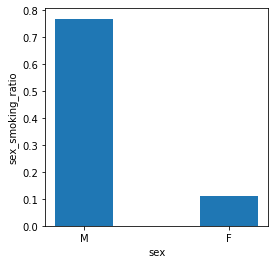

In [20]:
sex_group = ['M','F']

plt.figure(figsize = (4, 4))
plt.bar(sex_group, sex_smoking_ratio, width = 0.4)

plt.xlabel('sex')
plt.ylabel('sex_smoking_ratio')

In [22]:
[t_stat, p] = stats.ttest_ind(data[data.sex == 1.0].smoking, data[data.sex == 2.0].smoking)
[t_stat, p]
#  통계적으로 유의한 차이(p < 0.05)가 난다.

[176.54218982356767, 0.0]

## 흡연 여부에 따른 당뇨병의 비율

In [23]:
dia_ratio = data.groupby('smoking')['diabetes'].mean() #흡연자(1),비흡연자(0) 각각의 당뇨병 환자의 비율
dia_ratio

smoking
0.0    0.084123
1.0    0.107126
Name: diabetes, dtype: float64

Text(0, 0.5, 'diabetes ratio')

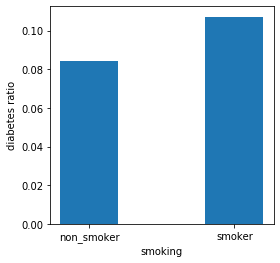

In [24]:
smoking_group = ['non_smoker', 'smoker']

plt.figure(figsize = (4, 4))
plt.bar(smoking_group, dia_ratio, width = 0.4)

plt.xlabel('smoking')
plt.ylabel('diabetes ratio')

In [26]:
[t_stat, p] = stats.ttest_ind(data[data.smoking == 0.0].diabetes, data[data.smoking == 1.0].diabetes)
[t_stat, p]
#  통계적으로 유의한 차이(p < 0.05)가 난다.

[-7.604571921894337, 2.923205147355777e-14]

In [49]:
# 전체에서 당뇨의 비율
(data['diabetes']==1.0).sum()/len(data)

0.09321550741163055

In [50]:
# 전체에서 당뇨가 아닌 사람의 비율
(data['diabetes']==0.0).sum()/len(data)

0.9067844925883695

#### >> 비율값 자체가 적은 이유는 당뇨병 환자의 데이터 자체가 매우 적기 때문이다.

## 흡연 여부에 따른 비만의 비율

In [39]:
obs_ratio = data.groupby('smoking')['obesity'].mean() #흡연자(1),비흡연자(0) 각각의 비만의 비율
obs_ratio

smoking
0.0    0.681423
1.0    0.731463
Name: obesity, dtype: float64

Text(0, 0.5, 'obesity ratio')

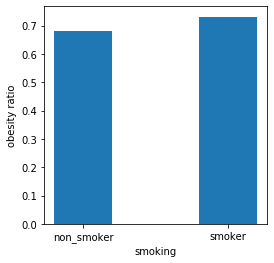

In [40]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_group, obs_ratio, width = 0.4)

plt.xlabel('smoking')
plt.ylabel('obesity ratio')

In [42]:
[t_stat, p] = stats.ttest_ind(data[data.smoking == 0.0].obesity, data[data.smoking == 1.0].obesity)
[t_stat, p]
#  통계적으로 유의한 차이(p < 0.05)가 난다.

[-17.02612945502385, 9.070454805315772e-65]

# 흡연에 따른 3대암(위암, 간암, 폐암) 환자의 비율

## 흡연 여부에 따른 위암의 비율

In [43]:
stomach_cancer_ratio = data.groupby('smoking')['stomach_cancer'].mean() #흡연자(1),비흡연자(0) 각각의 위암 환자의 비율
stomach_cancer_ratio

smoking
0.0    0.006514
1.0    0.012653
Name: stomach_cancer, dtype: float64

Text(0, 0.5, 'stomach_cancer_ratio')

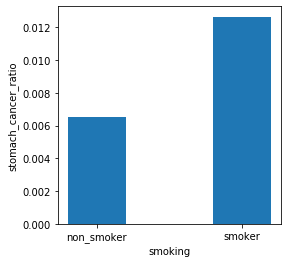

In [44]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_group, stomach_cancer_ratio, width = 0.4)

plt.xlabel('smoking')
plt.ylabel('stomach_cancer_ratio')

In [46]:
[t_stat, p] = stats.ttest_ind(data[data.smoking == 0.0].stomach_cancer, data[data.smoking == 1.0].stomach_cancer)
[t_stat, p]
#  통계적으로 유의한 차이(p < 0.05)가 난다.

[-6.2670004368964, 3.719507666853017e-10]

In [51]:
# 전체에서 위암의 비율
(data['stomach_cancer']==1.0).sum()/len(data)

0.008940603296361564

In [52]:
# 전체에서 위암이 아닌 사람의 비율
(data['stomach_cancer']==0.0).sum()/len(data)

0.9910593967036384

#### >> 비율값 자체가 적은 이유는 위암 환자의 데이터 자체가 매우 적기 때문이다.

## 흡연 여부에 따른 간암의 비율

In [56]:
liver_cancer_ratio = data.groupby('smoking')['liver_cancer'].mean()
liver_cancer_ratio

smoking
0.0    0.000686
1.0    0.002229
Name: liver_cancer, dtype: float64

Text(0, 0.5, 'liver_cancer_ratio')

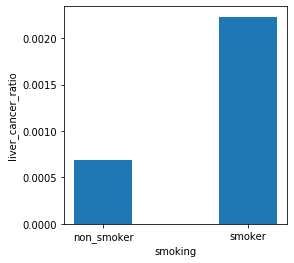

In [57]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_group, liver_cancer_ratio, width = 0.4)

plt.xlabel('smoking')
plt.ylabel('liver_cancer_ratio')

In [58]:
[t_stat, p] = stats.ttest_ind(data[data.smoking == 0.0].liver_cancer, data[data.smoking == 1.0].liver_cancer)
[t_stat, p]
#  통계적으로 유의한 차이(p < 0.05)가 난다.

[-4.121374943001032, 3.774037533428494e-05]

In [59]:
# 전체에서 간암의 비율
(data['liver_cancer']==1.0).sum()/len(data)

0.0012957396081683425

In [60]:
# 전체에서 간암이 아닌 사람의 비율
(data['liver_cancer']==0.0).sum()/len(data)

0.9987042603918317

#### >> 비율값 자체가 적은 이유는 간암 환자의 데이터 자체가 매우 적기 때문이다.

## 흡연 여부에 따른 폐암의 비율

In [62]:
lung_cancer_ratio = data.groupby('smoking')['lung_cancer'].mean()
lung_cancer_ratio

smoking
0.0    0.000814
1.0    0.003606
Name: lung_cancer, dtype: float64

Text(0, 0.5, 'lung_cancer_ratio')

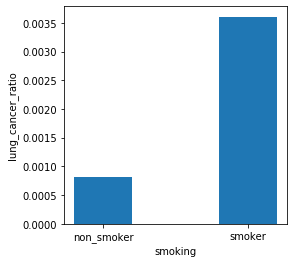

In [63]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_group, lung_cancer_ratio, width = 0.4)

plt.xlabel('smoking')
plt.ylabel('lung_cancer_ratio')

In [64]:
[t_stat, p] = stats.ttest_ind(data[data.smoking == 0.0].lung_cancer, data[data.smoking == 1.0].lung_cancer)
[t_stat, p]
#  통계적으로 유의한 차이(p < 0.05)가 난다.

[-6.131109346936033, 8.811291724523771e-10]

In [65]:
# 전체에서 폐암의 비율
(data['lung_cancer']==1.0).sum()/len(data)

0.0019176946200891469

In [66]:
# 전체에서 폐암이 아닌 사람의 비율
(data['lung_cancer']==1.0).sum()/len(data)

0.0019176946200891469

#### >> 비율값 자체가 적은 이유는 폐암 환자의 데이터 자체가 매우 적기 때문이다.

# 하루 평균 흡연량에 따른 질병의 비율
###### 1단계: 반갑이내(~10개비)       
###### 2단계: 반갑 ~ 한갑 이내( 11~20개비 )
###### 3단계: 한갑 ~ 두갑 이내( 21~40개 )             
###### 4단계: 두갑 초과( 41개비~ )
기준은 kosis 국가통계포털에 나와있는 수치를 참고하였습니다.

## 흡연자의 단계별 당뇨병 환자의 비율

In [71]:
stage_dia_ratio = data.groupby('smoking_stage')['diabetes'].mean()
stage_dia_ratio

smoking_stage
1단계    0.074783
2단계    0.094904
3단계    0.136865
4단계    0.230769
Name: diabetes, dtype: float64

Text(0, 0.5, 'diabetes ratio')

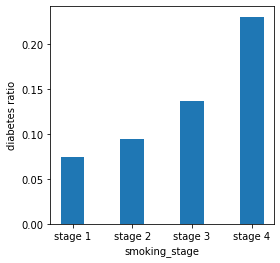

In [72]:
smoking_stage_group = ['stage 1', 'stage 2', 'stage 3', 'stage 4']

plt.figure(figsize = (4, 4))
plt.bar(smoking_stage_group, stage_dia_ratio, width = 0.4)

plt.xlabel('smoking_stage')
plt.ylabel('diabetes ratio')

## 흡연자의 단계별 비만의 비율

In [73]:
stage_obs_ratio = data.groupby('smoking_stage')['obesity'].mean() 
stage_obs_ratio

smoking_stage
1단계    0.699372
2단계    0.736039
3단계    0.756071
4단계    0.730769
Name: obesity, dtype: float64

Text(0, 0.5, 'obesity ratio')

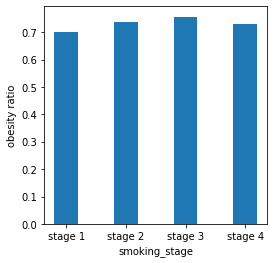

In [74]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_stage_group, stage_obs_ratio, width = 0.4)

plt.xlabel('smoking_stage')
plt.ylabel('obesity ratio')

## 흡연자의 단계별 위암의 비율

In [75]:
stage_stomach_cancer_ratio = data.groupby('smoking_stage')['stomach_cancer'].mean() 
stage_stomach_cancer_ratio

smoking_stage
1단계    0.005684
2단계    0.004883
3단계    0.002208
4단계    0.000000
Name: stomach_cancer, dtype: float64

Text(0, 0.5, 'stomach_cancer_ratio')

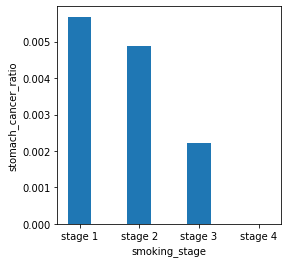

In [76]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_stage_group, stage_stomach_cancer_ratio, width = 0.4)

plt.xlabel('smoking_stage')
plt.ylabel('stomach_cancer_ratio')

## 흡연자의 단계별 간암의 비율

In [78]:
stage_liver_cancer_ratio = data.groupby('smoking_stage')['liver_cancer'].mean() # 흡연자의 단계별 간암의 비율
stage_liver_cancer_ratio

smoking_stage
1단계    0.000000
2단계    0.000610
3단계    0.002208
4단계    0.000000
Name: liver_cancer, dtype: float64

Text(0, 0.5, 'liver_cancer_ratio')

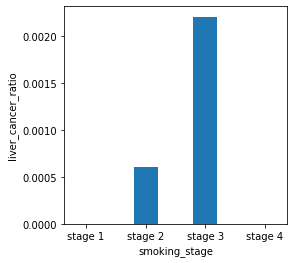

In [79]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_stage_group, stage_liver_cancer_ratio, width = 0.4)

plt.xlabel('smoking_stage')
plt.ylabel('liver_cancer_ratio')

## 흡연자의 단계별 폐암의 비율

In [80]:
stage_lung_cancer_ratio = data.groupby('smoking_stage')['lung_cancer'].mean() # 흡연자의 단계별 폐암의 비율
stage_lung_cancer_ratio

smoking_stage
1단계    0.000000
2단계    0.000915
3단계    0.000000
4단계    0.000000
Name: lung_cancer, dtype: float64

Text(0, 0.5, 'lung_cancer_ratio')

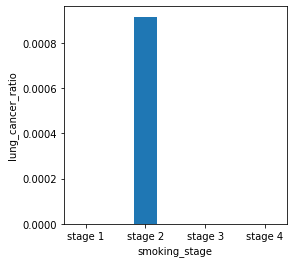

In [81]:
plt.figure(figsize = (4, 4))
plt.bar(smoking_stage_group, stage_lung_cancer_ratio, width = 0.4)

plt.xlabel('smoking_stage')
plt.ylabel('lung_cancer_ratio')